__Students:__ Andrea Ceriati, Kathryn Lesh, Emily Sims, Scott Zuckerbrow

__Instructor:__ Daniel Pulido-Mendez

__Course:__ Data Analytics Boot Camp

__Assignment:__ Project 4

__Date:__ 04/22/2024

## Table of Contents

[**Importing Libraries**](#IL)

1. [**Data Cleaning & Wrangling**](#DWrang)

    1.1 [**Checking and Correcting Data Format**](#Dform)

    1.2 [**Handling Missing Data**](#MissD)

2. [**Exploratory Data Analysis**](#EDA)

    2.1 [**Descriptive Statistics**](#DS)

    2.2 [**Correlation**](#Corr)

3. [**Model Development**](#MDev)

    3.1 [**Feature Selection, Logistic Regression, and K-Nearest Neighbors**](#FSel)

    3.2 [**Neural Networks**](#Nn)

4. [**Conclusions**](#Concl)

## Importing Libraries <a name="IL"></a>

In [43]:
import keras_tuner as kt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from scipy.stats import chi2_contingency
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

## 1. Data Cleaning & Wrangling <a name="DWrang"></a>

In [44]:
# Set display options to show all columns
pd.set_option('display.max_columns', None)

#  Import and read the "Shark Tank US dataset.csv".
sharktank_df = pd.read_csv("Shark Tank US dataset.csv")
sharktank_df.head()

,Season Number,Startup Name,Episode Number,Pitch Number,Season Start,Season End,Original Air Date,Industry,Business Description,Company Website,Pitchers Gender,Pitchers City,Pitchers State,Pitchers Average Age,Entrepreneur Names,Multiple Entrepreneurs,US Viewership,Original Ask Amount,Original Offered Equity,Valuation Requested,Got Deal,Total Deal Amount,Total Deal Equity,Deal Valuation,Number of Sharks in Deal,Investment Amount Per Shark,Equity Per Shark,Royalty Deal,Advisory Shares Equity,Loan,Deal Has Conditions,Barbara Corcoran Investment Amount,Barbara Corcoran Investment Equity,Mark Cuban Investment Amount,Mark Cuban Investment Equity,Lori Greiner Investment Amount,Lori Greiner Investment Equity,Robert Herjavec Investment Amount,Robert Herjavec Investment Equity,Daymond John Investment Amount,Daymond John Investment Equity,Kevin O Leary Investment Amount,Kevin O Leary Investment Equity,Guest Investment Amount,Guest Investment Equity,Guest Name,Barbara Corcoran Present,Mark Cuban Present,Lori Greiner Present,Robert Herjavec Present,Daymond John Present,Kevin O Leary Present,Guest Present
0,1,AvaTheElephant,1,1,9-Aug-09,5-Feb-10,9-Aug-09,Health/Wellness,Ava The Elephant - Baby and Child Care,http://www.avatheelephant.com/,Female,Atlanta,GA,NaN,Tiffany Krumins,0.0,4.15,50000,15.0,333333,1,50000.0,55.0,90909.0,1.0,50000.0,55.0,NaN,NaN,NaN,NaN,50000.0,55.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,1.0,1.0,NaN
1,1,Mr.Tod'sPieFactory,1,2,9-Aug-09,5-Feb-10,9-Aug-09,Food and Beverage,Mr. Tod's Pie Factory - Specialty Food,http://whybake.com/,Male,Somerset,NJ,NaN,Tod Wilson,0.0,4.15,460000,10.0,4600000,1,460000.0,50.0,920000.0,2.0,230000.0,25.0,NaN,NaN,NaN,NaN,230000.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,230000.0,25.0,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,1.0,1.0,NaN
2,1,Wispots,1,3,9-Aug-09,5-Feb-10,9-Aug-09,Business Services,Wispots - Consumer Services,http://www.wispots.com/,Male,Cary,NC,NaN,Kevin Flannery,0.0,4.15,1200000,10.0,12000000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,1.0,1.0,NaN
3,1,CollegeFoxesPackingBoxes,1,4,9-Aug-09,5-Feb-10,9-Aug-09,Lifestyle/Home,College Foxes Packing Boxes - Consumer Services,http://collegehunkshaulingjunk.com/,Male,Tampa,FL,NaN,"Nick Friedman, Omar Soliman",0.0,4.15,250000,25.0,1000000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,1.0,1.0,NaN
4,1,IonicEar,1,5,9-Aug-09,5-Feb-10,9-Aug-09,Software/Tech,Ionic Ear - Novelties,NaN,Male,St. Paul,MN,NaN,Darrin Johnson,0.0,4.15,1000000,15.0,6666667,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,1.0,1.0,NaN


In [45]:
# Determine the size of the dataframe
print("The sharktank_df dataframe has {} rows and {} columns.".format(*sharktank_df.shape))

The sharktank_df dataframe has 1345 rows and 53 columns.


### 1.1 Checking and correcting data format <a name="Dform"></a>

In [46]:
# Determine columns datatype
sharktank_df.dtypes

Season Number                           int64
Startup Name                           object
Episode Number                          int64
Pitch Number                            int64
Season Start                           object
Season End                             object
Original Air Date                      object
Industry                               object
Business Description                   object
Company Website                        object
Pitchers Gender                        object
Pitchers City                          object
Pitchers State                         object
Pitchers Average Age                   object
Entrepreneur Names                     object
Multiple Entrepreneurs                float64
US Viewership                         float64
Original Ask Amount                     int64
Original Offered Equity               float64
Valuation Requested                     int64
Got Deal                                int64
Total Deal Amount                 

In [47]:
# Convert "Season Start", "Season End", "Original Air Date" columns to datetime
# Specify the format of the dates
date_format = '%d-%b-%y'
sharktank_df['Season Start'] = pd.to_datetime(sharktank_df['Season Start'], format=date_format)
sharktank_df['Season End'] = pd.to_datetime(sharktank_df['Season End'], format=date_format)
sharktank_df['Original Air Date'] = pd.to_datetime(sharktank_df['Original Air Date'], format=date_format)

### 1.2 Handling Missing Data <a name="MissD"></a>

In [48]:
print("Number of null values in each column:")
sharktank_df.isnull().sum()

Number of null values in each column:


Season Number                            0
Startup Name                             0
Episode Number                           0
Pitch Number                             0
Season Start                             0
Season End                              71
Original Air Date                        0
Industry                                 0
Business Description                     0
Company Website                        758
Pitchers Gender                          7
Pitchers City                          819
Pitchers State                         556
Pitchers Average Age                   936
Entrepreneur Names                     495
Multiple Entrepreneurs                 427
US Viewership                            4
Original Ask Amount                      0
Original Offered Equity                  0
Valuation Requested                      0
Got Deal                                 0
Total Deal Amount                      531
Total Deal Equity                      531
Deal Valuat

In [49]:
sharktank_df.columns

Index(['Season Number', 'Startup Name', 'Episode Number', 'Pitch Number',
       'Season Start', 'Season End', 'Original Air Date', 'Industry',
       'Business Description', 'Company Website', 'Pitchers Gender',
       'Pitchers City', 'Pitchers State', 'Pitchers Average Age',
       'Entrepreneur Names', 'Multiple Entrepreneurs', 'US Viewership',
       'Original Ask Amount', 'Original Offered Equity', 'Valuation Requested',
       'Got Deal', 'Total Deal Amount', 'Total Deal Equity', 'Deal Valuation',
       'Number of Sharks in Deal', 'Investment Amount Per Shark',
       'Equity Per Shark', 'Royalty Deal', 'Advisory Shares Equity', 'Loan',
       'Deal Has Conditions', 'Barbara Corcoran Investment Amount',
       'Barbara Corcoran Investment Equity', 'Mark Cuban Investment Amount',
       'Mark Cuban Investment Equity', 'Lori Greiner Investment Amount',
       'Lori Greiner Investment Equity', 'Robert Herjavec Investment Amount',
       'Robert Herjavec Investment Equity', 'Daymon

In [50]:
# The company website has 587 missing values, replace data with binary data (1 has a website / 0 it does not have a website)
sharktank_df['Has_Website'] = sharktank_df['Company Website'].isna().astype(int)
sharktank_df.drop('Company Website',axis=1, inplace=True)
print("The sharktank_df dataframe has {} rows and {} columns.".format(*sharktank_df.shape))
sharktank_df.columns

The sharktank_df dataframe has 1345 rows and 53 columns.


Index(['Season Number', 'Startup Name', 'Episode Number', 'Pitch Number',
       'Season Start', 'Season End', 'Original Air Date', 'Industry',
       'Business Description', 'Pitchers Gender', 'Pitchers City',
       'Pitchers State', 'Pitchers Average Age', 'Entrepreneur Names',
       'Multiple Entrepreneurs', 'US Viewership', 'Original Ask Amount',
       'Original Offered Equity', 'Valuation Requested', 'Got Deal',
       'Total Deal Amount', 'Total Deal Equity', 'Deal Valuation',
       'Number of Sharks in Deal', 'Investment Amount Per Shark',
       'Equity Per Shark', 'Royalty Deal', 'Advisory Shares Equity', 'Loan',
       'Deal Has Conditions', 'Barbara Corcoran Investment Amount',
       'Barbara Corcoran Investment Equity', 'Mark Cuban Investment Amount',
       'Mark Cuban Investment Equity', 'Lori Greiner Investment Amount',
       'Lori Greiner Investment Equity', 'Robert Herjavec Investment Amount',
       'Robert Herjavec Investment Equity', 'Daymond John Investment A

In [51]:
sharktank_df.shape

(1345, 53)

In [52]:
sharktank_df['Has_Website'].sum()

758

In [53]:
# Determine the rows with missing values in Pitchers' Gender
# New dataframe
dfN1=sharktank_df[['Pitchers Gender']].copy()
dfN1[dfN1.isnull().any(axis=1)] # checks which rows in the new dataframe contain missing values

,Pitchers Gender
994,NaN
998,NaN
1000,NaN
1004,NaN
1070,NaN
1099,NaN
1121,NaN


In [54]:
# Determine the missing value gathering information from other columns such as Startup Name and Entrepreneur Names
sharktank_df.iloc[[994, 998, 1000, 1004, 1070, 1099, 1121]][["Entrepreneur Names","Startup Name"]]

,Entrepreneur Names,Startup Name
994,Wylie Robinson,Rumpl
998,Juan Salinas,PNuffCrunch
1000,Sobhan Kanaee and Kanz Kayfan,AnimatedLure
1004,Jordan Long and Liz Charm,SurpriseCake
1070,Harry Levin and Michael Sweigar,FurZapper
1099,Dwayne Walker and Tim Samuel,Sparketh
1121,Tommy Holl,TheRealElf


In [55]:
# Replace missing values in gender column after having conducted a brief research on the pitchers gender
sharktank_df.loc[994, 'Pitchers Gender'] = 'Male'
sharktank_df.loc[998, 'Pitchers Gender'] = 'Male'
sharktank_df.loc[1000, 'Pitchers Gender'] = 'Male'
sharktank_df.loc[1004, 'Pitchers Gender'] = 'Mixed Team'
sharktank_df.loc[1070, 'Pitchers Gender'] = 'Male'
sharktank_df.loc[1099, 'Pitchers Gender'] = 'Male'
sharktank_df.loc[1121, 'Pitchers Gender'] = 'Male'

Delete columns with a lot of missing values that seem unlikely to be relevant. 

In [56]:
# Drop Pitchers City, Pitchers State, and Pitchers Average Age. Also drop Season End date as redundant. 
sharktank_df.drop(columns=['Season End', 'Pitchers City', 'Pitchers State', 'Pitchers Average Age', 'Entrepreneur Names'], inplace=True)
print("The sharktank_df dataframe has {} rows and {} columns.".format(*sharktank_df.shape))

The sharktank_df dataframe has 1345 rows and 48 columns.


In [57]:
# Multiple Entrepreneurs column has a lot of missing values
# Replace values in column 'Multiple Entrepreneurs' where the corresponding value in column 'Pitchers Gender' is 'Mixed Team'.
sharktank_df.loc[sharktank_df['Pitchers Gender'] == 'Mixed Team', 'Multiple Entrepreneurs'] = 1

NOTE: 354 values still missing in 'Multiple Entrepreneurs' column. Drop it.

In [58]:
# Drop Multiple Entrepreneurs due to more than one-quarter of the values being missing for each column
sharktank_df.drop(columns=['Multiple Entrepreneurs'], inplace=True)

In [59]:
# Determine the rows with missing values in "US Viewership"
dfN2=sharktank_df[['US Viewership']] # defines a new dataframe
dfN2[dfN2.isnull().any(axis=1)] # checks which rows in the new dataframe contains missing values

,US Viewership
1341,NaN
1342,NaN
1343,NaN
1344,NaN


In [60]:
# Viewership has missing values for last four episodes, check what was the viewership for the episodes before the last four.
sharktank_df.tail(10)

,Season Number,Startup Name,Episode Number,Pitch Number,Season Start,Original Air Date,Industry,Business Description,Pitchers Gender,US Viewership,Original Ask Amount,Original Offered Equity,Valuation Requested,Got Deal,Total Deal Amount,Total Deal Equity,Deal Valuation,Number of Sharks in Deal,Investment Amount Per Shark,Equity Per Shark,Royalty Deal,Advisory Shares Equity,Loan,Deal Has Conditions,Barbara Corcoran Investment Amount,Barbara Corcoran Investment Equity,Mark Cuban Investment Amount,Mark Cuban Investment Equity,Lori Greiner Investment Amount,Lori Greiner Investment Equity,Robert Herjavec Investment Amount,Robert Herjavec Investment Equity,Daymond John Investment Amount,Daymond John Investment Equity,Kevin O Leary Investment Amount,Kevin O Leary Investment Equity,Guest Investment Amount,Guest Investment Equity,Guest Name,Barbara Corcoran Present,Mark Cuban Present,Lori Greiner Present,Robert Herjavec Present,Daymond John Present,Kevin O Leary Present,Guest Present,Has_Website
1335,15,FunkyMello,16,1335,2023-09-29,2024-03-01,Food and Beverage,Marshmallow creme,Mixed Team,3.13,50000,15.0,333333,1,50000.0,15.0,333333.0,1.0,50000.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50000.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,1.0,1.0,0
1336,15,DaVinciEyeApp,16,1336,2023-09-29,2024-03-01,Software/Tech,App for artists,Male,3.13,350000,5.0,7000000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,1.0,1.0,0
1337,15,Boona,17,1337,2023-09-29,2024-03-08,Lifestyle/Home,Tandem Showerhead,Male,3.13,400000,10.0,4000000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,NaN,1.0,NaN,0
1338,15,LetThemEatCandles,17,1338,2023-09-29,2024-03-08,Lifestyle/Home,Edible birthday candles,Mixed Team,3.13,250000,10.0,2500000,1,250000.0,18.0,1388889.0,1.0,250000.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250000.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,NaN,1.0,NaN,0
1339,15,ChefeeRobotics,17,1339,2023-09-29,2024-03-08,Electronics,Robotic chef,Male,3.13,500000,4.0,12500000,1,500000.0,15.0,3333333.0,1.0,500000.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500000.0,15.0,NaN,NaN,NaN,1.0,1.0,1.0,1.0,NaN,1.0,NaN,0
1340,15,LadyAlpha,17,1340,2023-09-29,2024-03-08,Lifestyle/Home,Nursing cover,Mixed Team,3.13,100000,10.0,1000000,1,100000.0,10.0,1000000.0,1.0,100000.0,10.0,NaN,NaN,NaN,NaN,100000.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,NaN,1.0,NaN,0
1341,15,NowhereBakery,18,1341,2023-09-29,2024-03-15,Food and Beverage,Healthy bakery,Mixed Team,NaN,200000,10.0,2000000,1,100000.0,12.5,800000.0,1.0,100000.0,12.5,NaN,NaN,100000.0,NaN,100000.0,12.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,1.0,1.0,0
1342,15,TheMurderMysteryCo,18,1342,2023-09-29,2024-03-15,Uncertain/Other,Murder mystery parties,Male,NaN,350000,5.0,7000000,1,350000.0,10.0,3500000.0,1.0,350000.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,350000.0,10.0,Jason Blum,1.0,1.0,1.0,NaN,NaN,1.0,1.0,0
1343,15,Overplay,18,1343,2023-09-29,2024-03-15,Software/Tech,App for video game creation,Mixed Team,NaN,500000,2.5,20000000,1,500000.0,4.0,12500000.0,1.0,500000.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,500000.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,1.0,1.0,0
1344,15,Nourish+Bloom,18,1344,2023-09-29,2024-03-15,Lifestyle/Home,Autonomous grocery store,Mixed Team,NaN,400000,5.0,8000000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,1.0,1.0,0


In [61]:
# Assume that the viewership will remain constant for the last four episodes, replace missing value with 3.13
sharktank_df['US Viewership'].replace(np.nan, 3.13, inplace=True)
print("The sharktank_df dataframe has {} rows and {} columns.".format(*sharktank_df.shape))

The sharktank_df dataframe has 1345 rows and 47 columns.


In [62]:
# Replace the missing values for the columns below with 0
sharktank_df[['Total Deal Amount', 'Total Deal Equity', 'Deal Valuation', 'Number of Sharks in Deal', 'Investment Amount Per Shark', 'Equity Per Shark', 'Royalty Deal', 'Loan']] = \
    sharktank_df[['Total Deal Amount', 'Total Deal Equity', 'Deal Valuation', 'Number of Sharks in Deal', 'Investment Amount Per Shark', 'Equity Per Shark', 'Royalty Deal', 'Loan']].fillna(0)

NOTE: Drop Loan column. Has just 55 non null values. 'Advisory Shares Equity' and 'Deal Has Conditions' have just 1 value each.

In [63]:
# Drop Pitchers City, Pitchers State, and Pitchers Average Age due to more than one-third of the values being missing for each column
sharktank_df.drop(columns=['Advisory Shares Equity', 'Loan', 'Deal Has Conditions'], inplace=True)
print("The sharktank_df dataframe has {} rows and {} columns.".format(*sharktank_df.shape))

The sharktank_df dataframe has 1345 rows and 44 columns.


In [64]:
def fill_present_columns(df, present_column, investment_column):
    # Replace missing values in 'present_column' with 1 where 'investment_column' is not missing
    df.loc[~df[investment_column].isna(), present_column] = 1

    # Identify rows where 'present_column' is 1
    guest_present_rows = df[df[present_column] == 1]

    # Replace missing values with 1 in the 'present_column' for the selected 'Season Number' and 'Episode Number'
    for index, row in guest_present_rows.iterrows():
        season_number = row['Season Number']
        episode_number = row['Episode Number']
        df.loc[(df['Season Number'] == season_number) & 
               (df['Episode Number'] == episode_number) &
               (df[present_column].isna()), present_column] = 1

In [65]:
# Call the function for Guests
fill_present_columns(sharktank_df, 'Guest Present', 'Guest Investment Amount')

In [66]:
# Assumption: if a guest did not make at least one deal in one episode he was not considered present in that episode
# Replace the missing values for the columns below with 0
sharktank_df[['Guest Investment Amount', 'Guest Investment Equity', 'Guest Present']] = \
    sharktank_df[['Guest Investment Amount', 'Guest Investment Equity', 'Guest Present']].fillna(0)

sharktank_df['Guest Name'].replace(np.nan, "NA", inplace=True)

In [67]:
# Assumption: if a investor did not make at least one deal in one episode he was not considered present that episodes 
#    (for episode in which we do not have data)
# Call the function defined above for Barbara Corcoran, Mark Cuban, Lori Greiner, Robert Herjavec, Daymond John, Kevin O Leary
fill_present_columns(sharktank_df, 'Barbara Corcoran Present', 'Barbara Corcoran Investment Amount')
fill_present_columns(sharktank_df, 'Mark Cuban Present', 'Mark Cuban Investment Amount')
fill_present_columns(sharktank_df, 'Lori Greiner Present', 'Lori Greiner Investment Amount')
fill_present_columns(sharktank_df, 'Robert Herjavec Present', 'Robert Herjavec Investment Amount')
fill_present_columns(sharktank_df, 'Daymond John Present', 'Daymond John Investment Amount')
fill_present_columns(sharktank_df, 'Kevin O Leary Present', 'Kevin O Leary Investment Amount')

In [68]:
# Replace the missing values for the columns below with 0
sharktank_df[['Barbara Corcoran Investment Amount', 
              'Barbara Corcoran Investment Equity', 
              'Mark Cuban Investment Amount', 
              'Mark Cuban Investment Equity', 
              'Lori Greiner Investment Amount',
              'Lori Greiner Investment Equity', 
              'Robert Herjavec Investment Amount', 
              'Robert Herjavec Investment Equity', 
              'Daymond John Investment Amount', 
              'Daymond John Investment Equity',
              'Kevin O Leary Investment Amount', 
              'Kevin O Leary Investment Equity', 
              'Barbara Corcoran Present', 
              'Mark Cuban Present', 
              'Lori Greiner Present', 
              'Robert Herjavec Present', 
              'Daymond John Present', 
              'Kevin O Leary Present']] = \
    sharktank_df[['Barbara Corcoran Investment Amount', 
                  'Barbara Corcoran Investment Equity', 
                  'Mark Cuban Investment Amount', 
                  'Mark Cuban Investment Equity', 
                  'Lori Greiner Investment Amount',
                  'Lori Greiner Investment Equity', 
                  'Robert Herjavec Investment Amount', 
                  'Robert Herjavec Investment Equity', 
                  'Daymond John Investment Amount', 
                  'Daymond John Investment Equity',
                  'Kevin O Leary Investment Amount', 
                  'Kevin O Leary Investment Equity', 
                  'Barbara Corcoran Present', 
                  'Mark Cuban Present', 
                  'Lori Greiner Present', 
                  'Robert Herjavec Present', 
                  'Daymond John Present', 
                  'Kevin O Leary Present']].fillna(0)

In [69]:
# Replace values in row 6 columns 'Mark Cuban Investment Amount', 'Mark Cuban Investment Equity', 'Mark Cuban Present' with 0 
# after confirming that MArc Cuban was not a shark in Shark Tank season 1 episode 2
sharktank_df.loc[6, ['Mark Cuban Investment Amount', 'Mark Cuban Investment Equity', 'Mark Cuban Present']] = 0

In [70]:
# Create new columns indicating whether each investor made a deal
sharktank_df['Barbara Corcoran Got Deal'] = (sharktank_df['Barbara Corcoran Investment Amount'] != 0).astype(int)
sharktank_df['Mark Cuban Got Deal'] = (sharktank_df['Mark Cuban Investment Amount'] != 0).astype(int)
sharktank_df['Lori Greiner Got Deal'] = (sharktank_df['Lori Greiner Investment Amount'] != 0).astype(int)
sharktank_df['Robert Herjavec Got Deal'] = (sharktank_df['Robert Herjavec Investment Amount'] != 0).astype(int)
sharktank_df['Daymond John Got Deal'] = (sharktank_df['Daymond John Investment Amount'] != 0).astype(int)
sharktank_df['Kevin O Leary Got Deal'] = (sharktank_df['Kevin O Leary Investment Amount'] != 0).astype(int)

In [71]:
# Determine the size of the dataframe
print("The sharktank_df dataframe has {} rows and {} columns.".format(*sharktank_df.shape))

The sharktank_df dataframe has 1345 rows and 50 columns.


In [72]:
# Check for remaining missing values
print('The number of missing values in the dataset is:',sharktank_df.isnull().sum().sum())

The number of missing values in the dataset is: 0


In [73]:
sharktank_df.isnull().sum()

Season Number                         0
Startup Name                          0
Episode Number                        0
Pitch Number                          0
Season Start                          0
Original Air Date                     0
Industry                              0
Business Description                  0
Pitchers Gender                       0
US Viewership                         0
Original Ask Amount                   0
Original Offered Equity               0
Valuation Requested                   0
Got Deal                              0
Total Deal Amount                     0
Total Deal Equity                     0
Deal Valuation                        0
Number of Sharks in Deal              0
Investment Amount Per Shark           0
Equity Per Shark                      0
Royalty Deal                          0
Barbara Corcoran Investment Amount    0
Barbara Corcoran Investment Equity    0
Mark Cuban Investment Amount          0
Mark Cuban Investment Equity          0


In [74]:
#sharktank_df.to_csv('output.csv', index=False)

## 2. Exploratory Data Analysis <a name="EDA"></a>

### 2.1 Descriptive Statistics <a name="DS"></a>

In [75]:
sharktank_df.describe()

,Season Number,Episode Number,Pitch Number,Season Start,Original Air Date,US Viewership,Original Ask Amount,Original Offered Equity,Valuation Requested,Got Deal,Total Deal Amount,Total Deal Equity,Deal Valuation,Number of Sharks in Deal,Investment Amount Per Shark,Equity Per Shark,Royalty Deal,Barbara Corcoran Investment Amount,Barbara Corcoran Investment Equity,Mark Cuban Investment Amount,Mark Cuban Investment Equity,Lori Greiner Investment Amount,Lori Greiner Investment Equity,Robert Herjavec Investment Amount,Robert Herjavec Investment Equity,Daymond John Investment Amount,Daymond John Investment Equity,Kevin O Leary Investment Amount,Kevin O Leary Investment Equity,Guest Investment Amount,Guest Investment Equity,Barbara Corcoran Present,Mark Cuban Present,Lori Greiner Present,Robert Herjavec Present,Daymond John Present,Kevin O Leary Present,Guest Present,Has_Website,Barbara Corcoran Got Deal,Mark Cuban Got Deal,Lori Greiner Got Deal,Robert Herjavec Got Deal,Daymond John Got Deal,Kevin O Leary Got Deal
count,1345.000000,1345.000000,1345.000000,1345,1345,1345.00000,1.345000e+03,1345.000000,1.345000e+03,1345.000000,1.345000e+03,1345.000000,1.345000e+03,1345.000000,1.345000e+03,1345.000000,1345.000000,1345.000000,1345.000000,1.345000e+03,1345.000000,1.345000e+03,1345.00000,1.345000e+03,1345.000000,1.345000e+03,1345.000000,1.345000e+03,1345.000000,1.345000e+03,1345.000000,1345.000000,1345.000000,1345.000000,1345.000000,1345.000000,1345.000000,1345.000000,1345.000000,1345.000000,1345.000000,1345.000000,1345.000000,1345.000000,1345.000000
mean,8.293680,12.361338,672.992565,2017-01-20 08:27:28.773234176,2017-05-03 08:11:25.204461056,5.04884,2.831717e+05,13.561190,3.566699e+06,0.605204,1.771250e+05,14.450097,1.305882e+06,0.797770,1.491436e+05,12.219577,0.059480,14081.784387,2.135836,4.656704e+04,3.143507,3.400929e+04,2.53265,2.693730e+04,1.697211,1.558786e+04,2.188463,2.206753e+04,1.404994,1.783705e+04,1.332565,0.491450,0.822305,0.721190,0.689219,0.535316,0.798513,0.279554,0.563569,0.095167,0.182900,0.159108,0.093680,0.086989,0.092937
min,1.000000,1.000000,1.000000,2009-08-09 00:00:00,2009-08-09 00:00:00,2.27000,1.000000e+04,1.000000,4.000000e+04,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.00000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,6.000000,337.000000,2013-09-20 00:00:00,2014-03-07 00:00:00,3.76000,1.000000e+05,10.000000,6.666670e+05,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.00000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.000000,12.000000,673.000000,2016-09-23 00:00:00,2017-02-10 00:00:00,4.68000,2.000000e+05,10.000000,1.600000e+06,1.000000,1.000000e+05,10.000000,3.000000e+05,1.000000,7.500000e+04,10.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.00000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,12.000000,18.000000,1009.000000,2020-10-16 00:00:00,2020-11-13 00:00:00,6.20000,3.500000e+05,20.000000,4.000000e+06,1.000000,2.500000e+05,25.000000,1.212121e+06,1.000000,2.000000e+05,20.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.00000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,15.000000,29.000000

In [76]:
sharktank_df.describe(include=object)

,Startup Name,Industry,Business Description,Pitchers Gender,Guest Name
count,1345,1345,1345,1345,1345
unique,1342,16,1343,3,35
top,EchoValleyMeats,Food and Beverage,Copa di Vino - Alcoholic Beverages,Male,NA
freq,2,292,2,739,1229


### 2.2 Correlation <a name="Corr"></a>

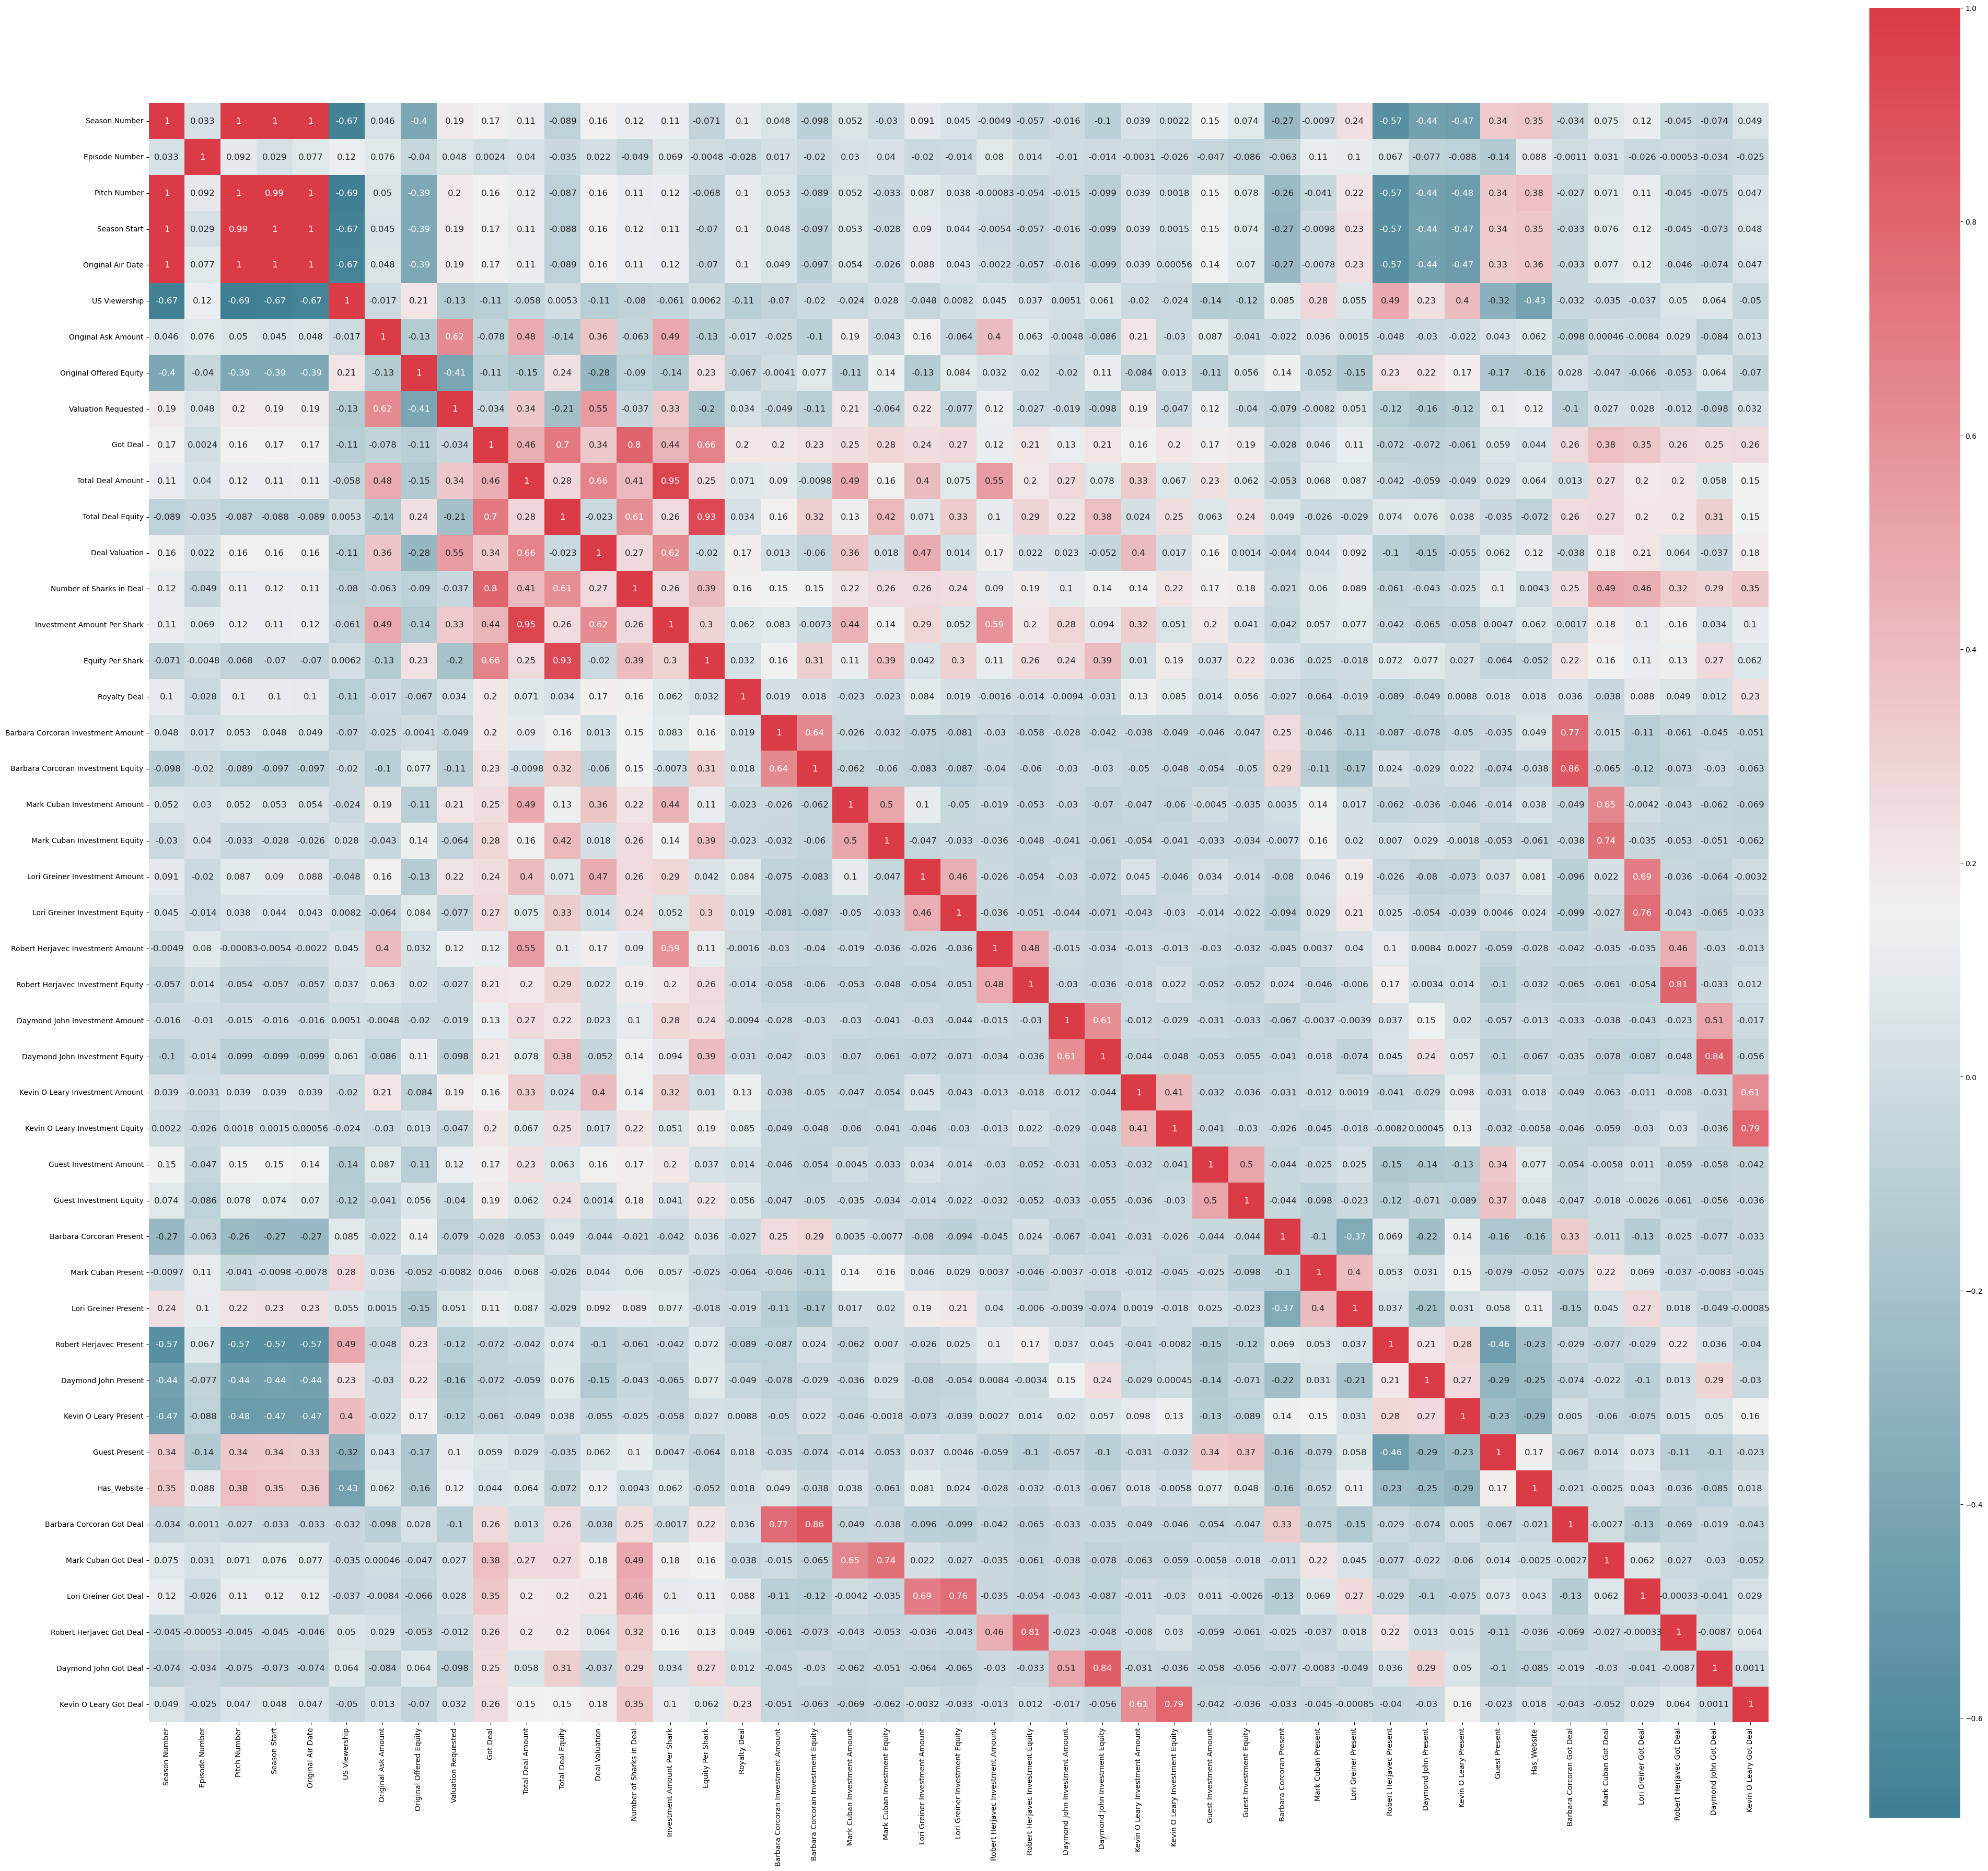

In [77]:
sharktank_corr_df = sharktank_df.drop(columns=['Startup Name','Industry','Business Description','Pitchers Gender','Guest Name'])

def plot_correlation_map(df):
    corr=df.corr()
    _,ax=plt.subplots(figsize=(50,50))
    cmap=sns.diverging_palette(220,10,as_cmap = True )
    _=sns.heatmap(corr,
        cmap=cmap,
        square=True,
        cbar_kws={'shrink':.9},
        ax=ax,
        annot=True,
        annot_kws={'fontsize':12})

plot_correlation_map(sharktank_corr_df)

## 3. Model Development <a name="MDev"></a>

### 3.1 Feature Selection, Logistic Regression & K-Nearest Neighbors <a name="FSel"></a>

In [78]:
# Select the columns that do not provide the answer to use in the feature selection
sharktank_fs_df = sharktank_df.loc[:, ['Got Deal','Industry','Pitchers Gender','US Viewership', 'Original Ask Amount',
                                       'Original Offered Equity','Has_Website','Barbara Corcoran Present','Mark Cuban Present',
                                       'Lori Greiner Present','Robert Herjavec Present','Daymond John Present', 'Kevin O Leary Present', 
                                       'Guest Present',]]

In [79]:
# Convert categorical data to numeric with `pd.get_dummies`
sharktank_fs_df_dummies = pd.get_dummies(sharktank_fs_df, dtype='int')
sharktank_fs_df_dummies.head(10)

,Got Deal,US Viewership,Original Ask Amount,Original Offered Equity,Has_Website,Barbara Corcoran Present,Mark Cuban Present,Lori Greiner Present,Robert Herjavec Present,Daymond John Present,Kevin O Leary Present,Guest Present,Industry_Automotive,Industry_Business Services,Industry_Children/Education,Industry_Electronics,Industry_Fashion/Beauty,Industry_Fitness/Sports/Outdoors,Industry_Food and Beverage,Industry_Green/CleanTech,Industry_Health/Wellness,Industry_Lifestyle/Home,Industry_Liquor/Alcohol,Industry_Media/Entertainment,Industry_Pet Products,Industry_Software/Tech,Industry_Travel,Industry_Uncertain/Other,Pitchers Gender_Female,Pitchers Gender_Male,Pitchers Gender_Mixed Team
0,1,4.15,50000,15.0,0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,1,4.15,460000,10.0,0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,0,4.15,1200000,10.0,0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,4.15,250000,25.0,0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,0,4.15,1000000,15.0,1,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
5,1,5.59,500000,15.0,0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
6,1,5.59,250000,10.0,0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7,0,5.59,500000,10.0,1,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8,0,5.59,200000,20.0,0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9,0,5.59,100000,20.0,1,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [80]:
print("The sharktank_df dataframe has {} rows and {} columns."\
      .format(*sharktank_fs_df_dummies.shape))

The sharktank_df dataframe has 1345 rows and 31 columns.


In [81]:
# Separate the data into labels and features
# Separate the y variable, the labels
y = sharktank_fs_df_dummies["Got Deal"]

# Separate the X variable, the features
X = sharktank_fs_df_dummies.drop(columns="Got Deal")

In [82]:
# Instantiate the StandardScaler
scaler = StandardScaler()

# Scale the features
X_scaled = scaler.fit_transform(X)

# Define the Logistic Regression model
logistic_model = LogisticRegression(solver='lbfgs', max_iter=100, random_state=1)

# Define the KNN model
knn_model = KNeighborsClassifier(n_neighbors=40)

In [83]:
def evaluate_model(X, y, model, n_features):
    
    # Create a sequential feature selector
    selector = SequentialFeatureSelector(
        model, n_features_to_select=n_features, scoring='f1')
    
    # Fit the selector to the scaled data
    selector.fit(X_scaled, y)
    
    # Get the selected features
    selected_features = selector.get_support()
    selected_feature_names = X.columns[selected_features]
    print(f"Selected Features: {list(selected_feature_names)}")
    print("")
    
    # Filter the X data with selected features
    X_selected_scaled = X_scaled[:, selected_features]
    
    # Split the scaled data using train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X_selected_scaled, 
                                                        y,
                                                        random_state=1,
                                                        stratify=y)
    
    # Fit the model using training data
    model.fit(X_train, y_train)
    
    # Make a prediction using the testing data
    predictions = model.predict(X_test)
    
    # Print the classification report for the model
    target_names = ["Did Not Got Deal", "Get Deal"]
    print(f"Number of Features: {n_features}")
    print(classification_report(y_test, predictions, target_names=target_names))
    print("")
    # Generate and print the confusion matrix
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, predictions))
    print("="*50)

# Iterate through different numbers of features for Logistic Regression
for n_features in range(1, len(X.columns)):
    print("Logistic Regression:")
    evaluate_model(X, y, logistic_model, n_features)

# Iterate through different numbers of features for KNN
for n_features in range(1, len(X.columns)):
    print("K-Nearest Neighbors:")
    evaluate_model(X, y, knn_model, n_features)


Logistic Regression:
Selected Features: ['Original Ask Amount']

Number of Features: 1
                  precision    recall  f1-score   support

Did Not Got Deal       0.60      0.02      0.04       133
        Get Deal       0.61      0.99      0.75       204

        accuracy                           0.61       337
       macro avg       0.60      0.51      0.40       337
    weighted avg       0.61      0.61      0.47       337


Confusion Matrix:
[[  3 130]
 [  2 202]]
Logistic Regression:
Selected Features: ['Original Ask Amount', 'Industry_Media/Entertainment']

Number of Features: 2
                  precision    recall  f1-score   support

Did Not Got Deal       0.60      0.02      0.04       133
        Get Deal       0.61      0.99      0.75       204

        accuracy                           0.61       337
       macro avg       0.60      0.51      0.40       337
    weighted avg       0.61      0.61      0.47       337


Confusion Matrix:
[[  3 130]
 [  2 202]]
Logistic

### 3.2 Neural Networks <a name="Nn"></a>

In [89]:
# Define a dataframe with the features determined in the feature selection

sharktank_nn_df_dummies = sharktank_fs_df_dummies.loc[:, ['Original Ask Amount', 'Original Offered Equity', 'Barbara Corcoran Present', 'Mark Cuban Present', 
                                                        'Lori Greiner Present', 'Robert Herjavec Present', 'Daymond John Present', 'Kevin O Leary Present', 
                                                        'Guest Present', 'Industry_Automotive', 'Industry_Business Services', 'Industry_Children/Education', 
                                                        'Industry_Electronics', 'Industry_Fashion/Beauty', 'Industry_Fitness/Sports/Outdoors', 
                                                        'Industry_Food and Beverage', 'Industry_Green/CleanTech', 'Industry_Health/Wellness', 
                                                        'Industry_Lifestyle/Home', 'Industry_Liquor/Alcohol', 'Industry_Media/Entertainment', 
                                                        'Industry_Pet Products', 'Industry_Software/Tech', 'Industry_Travel', 'Industry_Uncertain/Other', 
                                                        'Pitchers Gender_Female', 'Pitchers Gender_Male', 'Pitchers Gender_Mixed Team', 'Got Deal']]

#sharktank_nn_df_USETHIS = sharktank_df.loc[:, ['Episode Number', 'Pitch Number', 'Original Ask Amount', 'Valuation Requested', 'Got Deal']]

# sharktank_model_best_df = sharktank_df.loc[:, ['Episode Number', 'Pitch Number', 'Original Ask Amount', 'Got Deal']]

# sharktank_model0_df = sharktank_df.loc[:, ['Episode Number', 'Original Ask Amount', 'Got Deal']]

#sharktank_model1_df = sharktank_df.loc[:, ['Industry', 'Has_Website', 'US Viewership', 'Original Ask Amount', 'Original Offered Equity', 'Got Deal']]

# sharktank_model2_df = sharktank_df.loc[:, ['Industry', 'Has_Website', 'Pitchers Gender', 'US Viewership', 'Original Ask Amount', 'Original Offered Equity', 'Got Deal']]

# sharktank_model3_df = sharktank_df.loc[:, ['Industry', 'Has_Website', 'Pitchers Gender', 'US Viewership', 'Original Ask Amount', 'Original Offered Equity', 'Got Deal', 
#                                            'Barbara Corcoran Present', 'Mark Cuban Present', 'Lori Greiner Present', 'Robert Herjavec Present', 'Daymond John Present', 
#                                            'Kevin O Leary Present', 'Guest Present']]

# sharktank_model4_df = sharktank_df.loc[:, ['Season Number', 'Episode Number', 'Pitch Number', 'Industry', 'Has_Website', 'Pitchers Gender', 'US Viewership', 'Original Ask Amount', 
#                                            'Original Offered Equity', 'Got Deal', 'Barbara Corcoran Present', 'Mark Cuban Present','Lori Greiner Present', 'Robert Herjavec Present', 
#                                            'Daymond John Present', 'Kevin O Leary Present', 'Guest Present']]

# sharktank_model5_df = sharktank_df.loc[:, ['Season Number', 'Episode Number', 'Pitch Number', 'Startup Name','Industry','Business Description', 'Has_Website', 'Pitchers Gender', 'US Viewership', 'Original Ask Amount', 
#                                            'Original Offered Equity', 'Got Deal', 'Barbara Corcoran Present', 'Mark Cuban Present','Lori Greiner Present', 'Robert Herjavec Present', 
#                                            'Daymond John Present', 'Kevin O Leary Present', 'Guest Present']]


In [ ]:
# # Convert categorical data to numeric with `pd.get_dummies`
# sharktank_nn_df_dummies = pd.get_dummies(sharktank_nn_df, dtype='int')
# sharktank_nn_df_dummies.head(10)

In [90]:
print("The sharktank_df dataframe has {} rows and {} columns."\
      .format(*sharktank_nn_df_dummies.shape))

The sharktank_df dataframe has 1345 rows and 29 columns.


In [91]:
# Split our preprocessed data into our features and target arrays
y = sharktank_nn_df_dummies['Got Deal']
X = sharktank_nn_df_dummies.drop(columns = 'Got Deal')

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 8)

In [92]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [93]:
# Define the model - deep neural net.
number_input_features = X_train.shape[1]

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units = 20, activation='tanh', input_dim=number_input_features))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                580       
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 601
Trainable params: 601
Non-trainable params: 0
_________________________________________________________________


In [94]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [95]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=225)

Epoch 1/225
32/32 [==============================] - 0s 1ms/step - loss: 0.7709 - accuracy: 0.5099
Epoch 2/225
32/32 [==============================] - 0s 1ms/step - loss: 0.7164 - accuracy: 0.5417
Epoch 3/225
32/32 [==============================] - 0s 1ms/step - loss: 0.6867 - accuracy: 0.5704
Epoch 4/225
32/32 [==============================] - 0s 1ms/step - loss: 0.6714 - accuracy: 0.5843
Epoch 5/225
32/32 [==============================] - 0s 1ms/step - loss: 0.6613 - accuracy: 0.5992
Epoch 6/225
32/32 [==============================] - 0s 1ms/step - loss: 0.6555 - accuracy: 0.6131
Epoch 7/225
32/32 [==============================] - 0s 2ms/step - loss: 0.6516 - accuracy: 0.6230
Epoch 8/225
32/32 [==============================] - 0s 2ms/step - loss: 0.6492 - accuracy: 0.6240
Epoch 9/225
32/32 [==============================] - 0s 2ms/step - loss: 0.6466 - accuracy: 0.6319
Epoch 10/225
32/32 [==============================] - 0s 1ms/step - loss: 0.6439 - accuracy: 0.6379
Epoch 11/

<Axes: >

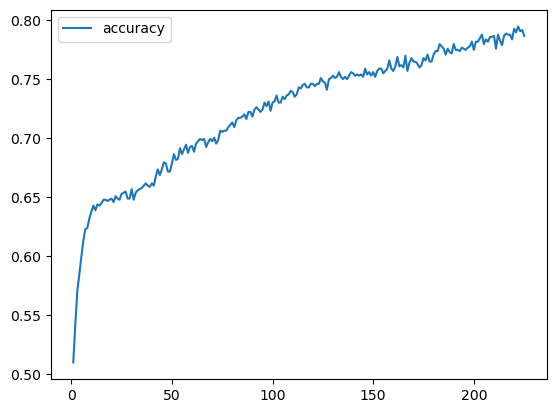

In [96]:
history_df = pd.DataFrame(fit_model.history)
history_df.index +=1
history_df.plot(y="accuracy")

In [97]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

11/11 - 0s - loss: 0.8044 - accuracy: 0.5816 - 153ms/epoch - 14ms/step
Loss: 0.8044133186340332, Accuracy: 0.5816023945808411


In [ ]:
# # Export our model to HDF5 file
# nn.save('my_model.h5')
# nn.save('my_model.keras')

In [111]:
# Define a function to perform hyperparameter tuning
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh'])

    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=30,
        step=5), activation=activation, input_dim=number_input_features))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 5)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=30,
            step=5),
            activation=activation))

    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])

    return nn_model

In [112]:
tuner = kt.Hyperband(
    create_model,
    objective = "val_accuracy",
    max_epochs=20,
    hyperband_iterations=2
)

Reloading Tuner from .\untitled_project\tuner0.json


In [120]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled, y_train, epochs=30, validation_data=(X_test_scaled, y_test))

# # Get top 3 model hyperparameters and print the values
# top_3_hyper = tuner.get_best_hyperparameters(3)
# for param in top_3_hyper:
#     print(param.values)

# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'activation': 'tanh',
 'first_units': 16,
 'num_layers': 5,
 'units_0': 1,
 'units_1': 16,
 'units_2': 16,
 'units_3': 11,
 'units_4': 1,
 'tuner/epochs': 20,
 'tuner/initial_epoch': 7,
 'tuner/bracket': 2,
 'tuner/round': 2,
 'tuner/trial_id': '0044'}

In [119]:
# # Evaluate the top 3 models against the test dataset
# top_3_models = tuner.get_best_models(3)
# for model in top_3_models:
#     model_loss, model_accuracy = model.evaluate(X_test_scaled, y_test, verbose=2)
#     print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [114]:
# Define the model based on hyperparamter tuning results
nn_best = tf.keras.models.Sequential()

# Add the first hidden layer
nn_best.add(tf.keras.layers.Dense(units=16, activation='tanh', input_dim=number_input_features))

# Add additional hidden layers
nn_best.add(tf.keras.layers.Dense(units=1, activation='tanh'))
nn_best.add(tf.keras.layers.Dense(units=16, activation='tanh'))
nn_best.add(tf.keras.layers.Dense(units=16, activation='tanh'))
nn_best.add(tf.keras.layers.Dense(units=11, activation='tanh'))
nn_best.add(tf.keras.layers.Dense(units=1, activation='tanh'))

# Add the output layer
nn_best.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn_best.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 16)                464       
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
 dense_9 (Dense)             (None, 16)                32        
                                                                 
 dense_10 (Dense)            (None, 16)                272       
                                                                 
 dense_11 (Dense)            (None, 11)                187       
                                                                 
 dense_12 (Dense)            (None, 1)                 12        
                                                                 
 dense_13 (Dense)            (None, 1)                

In [115]:
# Compile the model
nn_best.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [116]:
# Train the model
fit_model_best = nn_best.fit(X_train_scaled, y_train, epochs=225)

Epoch 1/225
32/32 [==============================] - 1s 1ms/step - loss: 0.6780 - accuracy: 0.5952
Epoch 2/225
32/32 [==============================] - 0s 1ms/step - loss: 0.6706 - accuracy: 0.6081
Epoch 3/225
32/32 [==============================] - 0s 1ms/step - loss: 0.6697 - accuracy: 0.6081
Epoch 4/225
32/32 [==============================] - 0s 2ms/step - loss: 0.6690 - accuracy: 0.6081
Epoch 5/225
32/32 [==============================] - 0s 2ms/step - loss: 0.6661 - accuracy: 0.6081
Epoch 6/225
32/32 [==============================] - 0s 2ms/step - loss: 0.6650 - accuracy: 0.5913
Epoch 7/225
32/32 [==============================] - 0s 1ms/step - loss: 0.6611 - accuracy: 0.5952
Epoch 8/225
32/32 [==============================] - 0s 1ms/step - loss: 0.6594 - accuracy: 0.6042
Epoch 9/225
32/32 [==============================] - 0s 1ms/step - loss: 0.6579 - accuracy: 0.6161
Epoch 10/225
32/32 [==============================] - 0s 2ms/step - loss: 0.6513 - accuracy: 0.6171
Epoch 11/

In [117]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_best.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

11/11 - 0s - loss: 0.8805 - accuracy: 0.5816 - 132ms/epoch - 12ms/step
Loss: 0.8804684281349182, Accuracy: 0.5816023945808411


<Axes: >

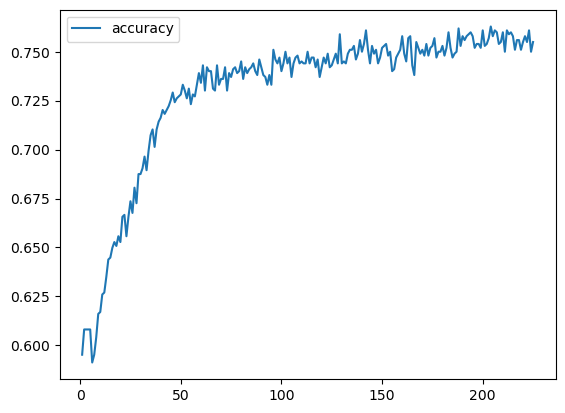

In [118]:
history_df = pd.DataFrame(fit_model_best.history)
history_df.index +=1
history_df.plot(y="accuracy")

## Chi-Square Test Comparing Pitchers Gender and Got Deal

In [ ]:
# Chi-square test
# Designed for categorical data, non-parametric, no underlying probability dist., detects association, not causation


# Create contingency table
contingency_table_gender = pd.crosstab(sharktank_df['Pitchers Gender'], sharktank_df['Got Deal'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table_gender)

print("Observed Data:")
print(contingency_table_gender)
print("\n")

print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("\n")
print("Expected frequencies table:")
print(expected)

In [ ]:
print(f"Chi-square statistic of {round(chi2, 2)} indicates that there is some discrepancy between the observed and expected frequencies of deals made by different genders of pitchers.")
print(f"Since the p-value is {round(p, 3)}, we can reject the null hypothesis, that there is no association between Pitchers Gender and Got Deal.")

In [ ]:
observed_frequencies_gender = contingency_table_gender.iloc[:, 1].values  # Actual deals made
expected_frequencies_gender = expected[:, 1]  # Expected deals based on chi-square test

# Category labels
categories_gender = contingency_table_gender.index

# Create a DataFrame for visualization
data = pd.DataFrame({'Category': categories_gender,
                     'Observed': observed_frequencies_gender,
                     'Expected': expected_frequencies_gender})

# Plotting
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(categories_gender))

# Plot observed frequencies
plt.bar(index, data['Observed'], bar_width, label='Observed', color='b')

# Plot expected frequencies
plt.bar(index + bar_width, data['Expected'], bar_width, label='Expected', color='r')

# Add labels, title, and legend
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Observed vs Expected Frequencies')
plt.xticks(index + bar_width / 2, categories_gender)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

## Correlation between Business Valuation and Got Deal

In [ ]:
# Pearson's correlation
pearson_corr = sharktank_df['Valuation Requested'].corr(sharktank_df['Got Deal'], method='pearson')

# Spearman's correlation
spearman_corr = sharktank_df['Valuation Requested'].corr(sharktank_df['Got Deal'], method='spearman')

print("Pearson's correlation coefficient:", pearson_corr)
print("Spearman's correlation coefficient:", spearman_corr)

In [ ]:
# Chi-square test
# Designed for categorical data, non-parametric, no underlying probability dist., detects association, not causation


# Create contingency table
contingency_table_industry = pd.crosstab(sharktank_df['Industry'], sharktank_df['Got Deal'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table_industry)

print("Observed Data:")
print(contingency_table_industry)
print("\n")

print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("\n")
print("Expected frequencies table:")
print(expected)

In [ ]:
print(f"Since the p-value is {round(p, 3)}, we can not reject the null hypothesis, that there is no association between Industry and Got Deal.")
print("In other words, there is insufficient evidence to conclude that there is an association between industry and getting a deal based on the observed data.")

In [ ]:
observed_frequencies_industry = contingency_table_industry.iloc[:, 1].values  # Actual deals made
expected_frequencies_industry = expected[:, 1]  # Expected deals based on chi-square test

# Category labels
categories_industry = contingency_table_industry.index

# Create a DataFrame for visualization
data = pd.DataFrame({'Category': categories_industry,
                     'Observed': observed_frequencies_industry,
                     'Expected': expected_frequencies_industry})

# Plotting
plt.figure(figsize=(12, 6))
bar_width = 0.25
index = np.arange(len(categories_industry))

# Plot observed frequencies
plt.bar(index, data['Observed'], bar_width, label='Observed', color='b')

# Plot expected frequencies
plt.bar(index + bar_width, data['Expected'], bar_width, label='Expected', color='r')

# Add labels, title, and legend
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Observed vs Expected Frequencies')
plt.xticks(index + bar_width / 2, categories_industry, rotation = 90)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

In [ ]:
# Chi-square test
# Designed for categorical data, non-parametric, no underlying probability dist., detects association, not causation


# Create contingency table
contingency_table_website = pd.crosstab(sharktank_df['Has_Website'], sharktank_df['Got Deal'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table_website)

print("Observed Data:")
print(contingency_table_website)
print("\n")

print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("\n")
print("Expected frequencies table:")
print(expected)


In [ ]:
print(f"Since the p-value is {round(p, 3)}, we can not reject the null hypothesis, that there is no association between having a company website and Got Deal.")
print("In other words, there is insufficient evidence to conclude that there is an association between having a company website and getting a deal based on the observed data.")

In [ ]:
# List to store results
chi_square_results = []

# Loop through each column
for column in sharktank_df.columns:
    # Create contingency table
    contingency_table = pd.crosstab(sharktank_df[column], sharktank_df['Got Deal'])
    
    # Perform chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Append results to the list
    chi_square_results.append({
        'Column': column,
        'Chi-square statistic': chi2,
        'P-value': p,
        'Degrees of freedom': dof,
        'Expected frequencies table': expected
    })

# Print results
for result in chi_square_results:
    print("Column:", result['Column'])
    print("Chi-square statistic:", result['Chi-square statistic'])
    print("P-value:", result['P-value'])
#     print("Degrees of freedom:", result['Degrees of freedom'])
#     print("Expected frequencies table:")
#     print(result['Expected frequencies table'])
    print("\n")


In [ ]:
# Sort the results by p-value
sorted_results = sorted(chi_square_results, key=lambda x: x['P-value'])

# Print the sorted results
for result in sorted_results:
    print("Column:", result['Column'])
    print("Chi-square statistic:", result['Chi-square statistic'])
    print("P-value:", result['P-value'])
    print("\n")